# Laboratorio 3: Herramienta para la segmentación de señales de tráfico en imágenes capturadas desde un vehículo.

**Alumno:** Adán Piñero Alquegui.<br>
**Asignatura:** Percepción computacional 2020-21.<br>
**Presentación:** Voluntario en caso de proponerse exposición.<br>
**Enlace repositorio:** https://github.com/adanpinnero/PercepcionAct03 <br>

**Índice:** <br>

1. Planteamiento del problema.<br>
2. Estrategia de segmentación.<br>
3. Comparativa de los segmentadores utilizados<br>
4. Conclusiones <br>

#### 1.- Planteamiento del problema.
Los vehículos actuales incorporan cámaras en sus parabrisas con el objeto de capturar información de la carretera.
Las señales de tráfico aportan información relevante para la conducción. En la presente actividad se estudiará la forma
de segmentar las imágenes capturadas por la cámara del vehículo y diferenciar la señal de tráfico del resto.

A continuación se procede a cargar las librerias necesarias así como las 4 imágenes seleccionadas para pruebas. Éstas imágenes se han obtenido directamente de google fotos, siendo por tanto heterogéneas. Los resultados obtenidos en la implantación sobre un vehículo real, siempre con una misma cámara, serán en todo caso más ajustados a los conseguidos en el presente estudio.

In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.segmentation import slic,quickshift,felzenszwalb
from skimage.color import rgb2gray,label2rgb
import time
from scipy import ndimage

img1, img2 = io.imread('senal1.jpg'),io.imread('senal2.jpg')
img3, img4 = io.imread('senal3.jpg'),io.imread('senal6.jpg')

Las imágenes captadas desde el vehículo se muestran a continuación:

Text(0.5, 1.0, 'Original 4')

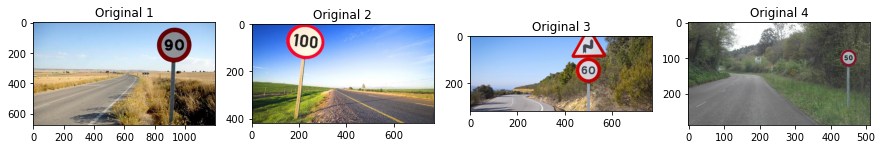

In [2]:
fig1, axs = plt.subplots(ncols=4,nrows=1,figsize=(15,15))
axs[0].imshow(img1)
axs[0].set_title("Original 1")
axs[1].imshow(img2)
axs[1].set_title("Original 2")
axs[2].imshow(img3)
axs[2].set_title("Original 3")
axs[3].imshow(img4)
axs[3].set_title("Original 4")

#### 2.- Estrategia de segmentación.
Para poder diferenciar la señal de tráfico del resto de elementos de la imagen se optará por una segmentación. Dado que es necesario que el sistema detecte
de forma autónoma las señales no es posible actuación alguna por parte del usuario. Por este motivo
se opta por técnicas de segmentación no supervisada.
Una vez segmentada la imagen se procederá a diferenciar las regiones que forman parte de la señal del resto de regiones
con la ayuda de conocer que toda señal tiene un característico borde rojo.

Se procede a procesar las 4 imágenes con los siguientes segmentadores:
- SLIC
- Quickshift
- Felzenswalb

El vehículo están en movimiento por lo que es importante disponer de la información
en un tiempo corto. Por ello se analizan los tiempos de segmentación ya que son una característica
decisiva en la implementación.

In [3]:
def segmentar(img):
    start_time = time.time()
    etiquetas_slic = slic(rgb2gray(img),n_segments=1000,compactness=0.1)
    print("Tiempo segmentador SLIC--- %s seconds ---" % (time.time() - start_time))
    etiquetas_quickshift = quickshift(img)#,ratio=0.001,kernel_size=20,max_dist=10
    print("Tiempo segmentador Quickshift--- %s seconds ---" % (time.time() - start_time))
    etiquetas_felzenszwalb = felzenszwalb(rgb2gray(img))
    print("Tiempo segmentador Felzenszwalb--- %s seconds ---" % (time.time() - start_time))

    fig1, axs = plt.subplots(ncols=3,nrows=1,figsize=(15,15))
    axs[0].imshow(etiquetas_slic)
    axs[0].set_title("slic")
    axs[1].imshow(etiquetas_quickshift)
    axs[1].set_title("quickshift")
    axs[2].imshow(etiquetas_felzenszwalb)
    axs[2].set_title("felzenswalb")

    return etiquetas_slic,etiquetas_quickshift,etiquetas_felzenszwalb

Los tiempos de segmentación son los siguientes:

<ipython-input-3-68f4677585c9>:3: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  etiquetas_slic = slic(rgb2gray(img),n_segments=1000,compactness=0.1)


Tiempo segmentador SLIC--- 0.7607729434967041 seconds ---
Tiempo segmentador Quickshift--- 14.216278076171875 seconds ---
Tiempo segmentador Felzenszwalb--- 15.524770975112915 seconds ---
Tiempo segmentador SLIC--- 0.3059673309326172 seconds ---
Tiempo segmentador Quickshift--- 5.201482534408569 seconds ---
Tiempo segmentador Felzenszwalb--- 5.580512285232544 seconds ---
Tiempo segmentador SLIC--- 0.24899744987487793 seconds ---
Tiempo segmentador Quickshift--- 4.104172229766846 seconds ---
Tiempo segmentador Felzenszwalb--- 4.378974199295044 seconds ---
Tiempo segmentador SLIC--- 0.14895963668823242 seconds ---
Tiempo segmentador Quickshift--- 2.4920544624328613 seconds ---
Tiempo segmentador Felzenszwalb--- 2.6520965099334717 seconds ---


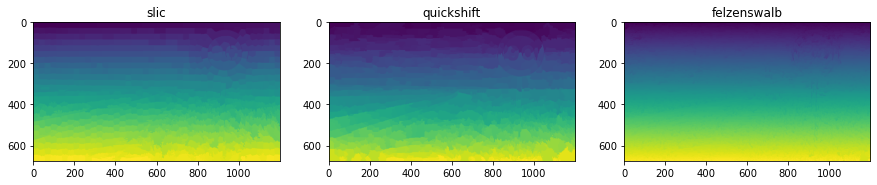

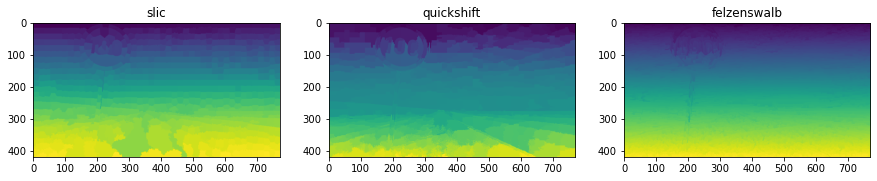

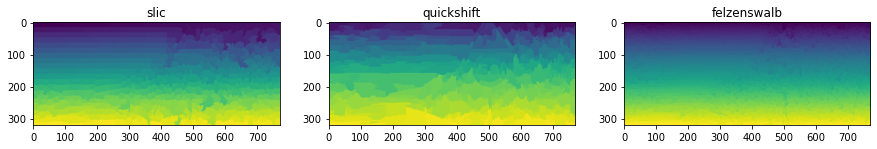

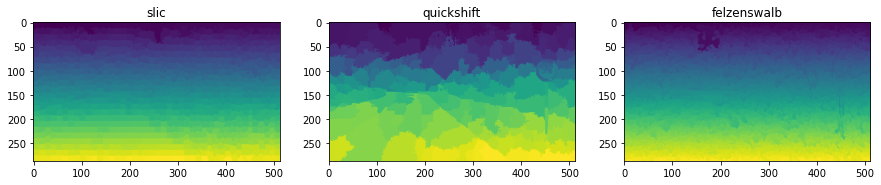

In [4]:
etiquetas_slic1,etiquetas_quickshift1,etiquetas_felzenszwalb1 = segmentar(img1)
etiquetas_slic2,etiquetas_quickshift2,etiquetas_felzenszwalb2 = segmentar(img2)
etiquetas_slic3,etiquetas_quickshift3,etiquetas_felzenszwalb3 = segmentar(img3)
etiquetas_slic4,etiquetas_quickshift4,etiquetas_felzenszwalb4 = segmentar(img4)

Observamos que el segmentador SLIC presenta tiempos muy inferiores a Quickshif y Felzenswalb. A priori, si se demuestra
capaz de segmentar adecuadamente, presenta tiempos más razonables de procesado.
A continuación procedemos a colorear las etiquetas con la media de color de los píxeles de
la región en la imagen original. De esta forma es más fácil apreciar la segmentación realizada.

<ipython-input-5-7eff8b4ff48c>:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  etiquetas_color_slic=label2rgb(etiquetas_slic,img,kind='avg')
<ipython-input-5-7eff8b4ff48c>:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  etiquetas_color_quickshift=label2rgb(etiquetas_quickshift,img,kind='avg')
<ipython-input-5-7eff8b4ff48c>:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  etiquetas_color_fb=label2rgb(etiquetas_felzenszwalb,img,kind

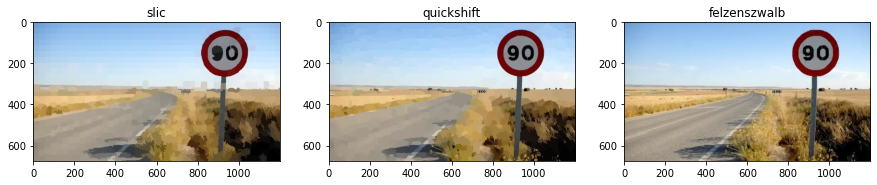

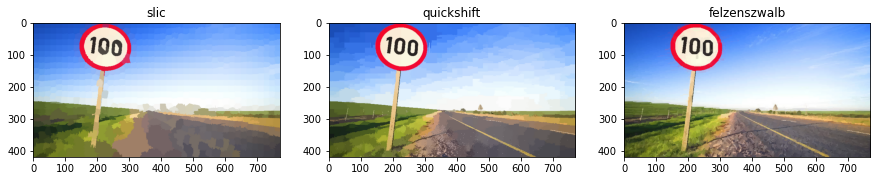

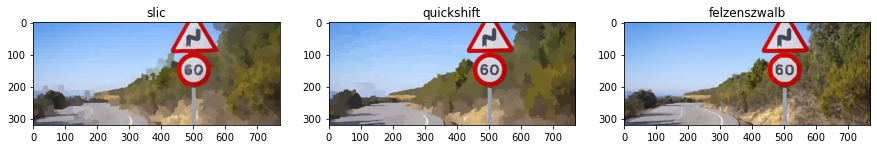

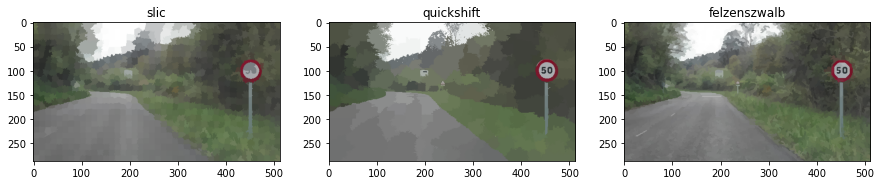

In [5]:
def colorear_etiquetas(etiquetas_slic,etiquetas_quickshift,etiquetas_felzenszwalb,img):
    etiquetas_color_slic=label2rgb(etiquetas_slic,img,kind='avg')
    etiquetas_color_quickshift=label2rgb(etiquetas_quickshift,img,kind='avg')
    etiquetas_color_fb=label2rgb(etiquetas_felzenszwalb,img,kind='avg')

    fig1, axs = plt.subplots(ncols=3,nrows=1,figsize=(15,15))
    axs[0].imshow(etiquetas_color_slic)
    axs[0].set_title("slic")
    axs[1].imshow(etiquetas_color_quickshift)
    axs[1].set_title("quickshift")
    axs[2].imshow(etiquetas_color_fb)
    axs[2].set_title("felzenszwalb")
    return etiquetas_color_slic,etiquetas_color_quickshift,etiquetas_color_fb
etiquetas_color_slic1,etiquetas_color_quickshift1,etiquetas_color_fb1=colorear_etiquetas(etiquetas_slic1,etiquetas_quickshift1,etiquetas_felzenszwalb1,img1)
etiquetas_color_slic2,etiquetas_color_quickshift2,etiquetas_color_fb2=colorear_etiquetas(etiquetas_slic2,etiquetas_quickshift2,etiquetas_felzenszwalb2,img2)
etiquetas_color_slic3,etiquetas_color_quickshift3,etiquetas_color_fb3=colorear_etiquetas(etiquetas_slic3,etiquetas_quickshift3,etiquetas_felzenszwalb3,img3)
etiquetas_color_slic4,etiquetas_color_quickshift4,etiquetas_color_fb4=colorear_etiquetas(etiquetas_slic4,etiquetas_quickshift4,etiquetas_felzenszwalb4,img4)

De las segmentaciones con las regiones coloreadas concluimos que en principio los segmentadores
están segmentando de forma razonable el borde rojo de la señal, que es en principio
la zona que buscamos.
A continuación procedemos a separar del resto la región con borde rojo de la señal,
aprovechando que conocemos precisamente ésta característica de las señales de tráfico.
El siguiente algoritmo generará una nueva imagen binaria donde sólo mostrará aquellas
regiones cuyo nivel de rojo supere un umbral. Se han realizado diferentes pruebas de umbral,
consluyendo:
- El umbral de rojo es un parámetro determinante y pueden añadirse estrategias para su ajuste, con la ayuda incluso de sensores de luz.
- Es importante la resolución cromática de la cámara y la influencia de otros factores en el color, como los faros.
- En este tipo de sistemas será importante la homogeneidad y buen mantenimiento de las señales de tráfico


In [6]:
import numpy as np

def mascara(etiquetas,umbral=50):
    mascara=np.zeros(etiquetas.shape)
    for i in range(etiquetas.shape[0]):
            for j in range(etiquetas.shape[1]):
                if etiquetas[i][j][0]-umbral > etiquetas[i][j][1] and etiquetas[i][j][0]-umbral > etiquetas[i][j][2]:
                    mascara[i][j] = 1
                else:
                    mascara[i][j] = 0
    return mascara

def plot3(etiquetas_color_slic_mask,etiquetas_color_quickshift_mask,etiquetas_color_fb_mask):
    fig1, axs = plt.subplots(ncols=3,nrows=1,figsize=(15,15))
    axs[0].imshow(etiquetas_color_slic_mask)
    axs[0].set_title("slic")
    axs[1].imshow(etiquetas_color_quickshift_mask)
    axs[1].set_title("Quickshift")
    axs[2].imshow(etiquetas_color_fb_mask)
    axs[2].set_title("Felzenszwalb")

Los resultados que muestran la región del borde de la señal binarizada son los siguientes. Ésta será
la salida utilizada para compobar el rendimiento de los segmentadores frente a un Ground Truth.

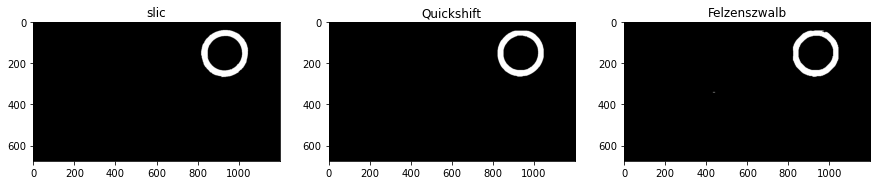

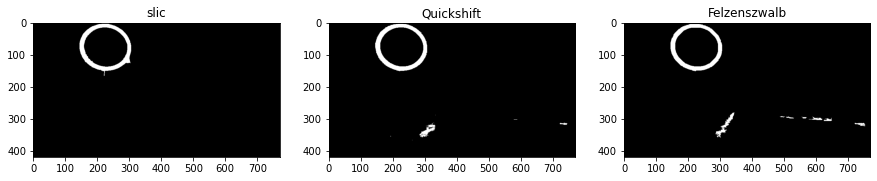

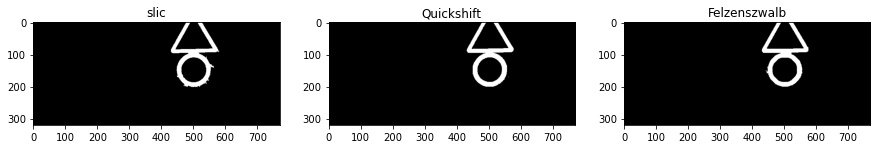

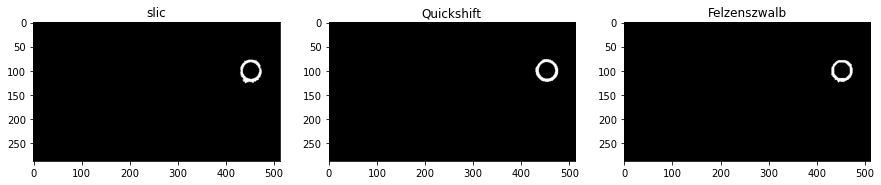

In [7]:
etiquetas_color_slic_mask1 = mascara(etiquetas_color_slic1)
etiquetas_color_quickshift_mask1 = mascara(etiquetas_color_quickshift1)
etiquetas_color_fb_mask1 = mascara(etiquetas_color_fb1)
plot3(etiquetas_color_slic_mask1,etiquetas_color_quickshift_mask1,etiquetas_color_fb_mask1)

etiquetas_color_slic_mask2 = mascara(etiquetas_color_slic2)
etiquetas_color_quickshift_mask2 = mascara(etiquetas_color_quickshift2)
etiquetas_color_fb_mask2 = mascara(etiquetas_color_fb2)
plot3(etiquetas_color_slic_mask2,etiquetas_color_quickshift_mask2,etiquetas_color_fb_mask2)

etiquetas_color_slic_mask3 = mascara(etiquetas_color_slic3)
etiquetas_color_quickshift_mask3 = mascara(etiquetas_color_quickshift3)
etiquetas_color_fb_mask3 = mascara(etiquetas_color_fb3)
plot3(etiquetas_color_slic_mask3,etiquetas_color_quickshift_mask3,etiquetas_color_fb_mask3)

etiquetas_color_slic_mask4 = mascara(etiquetas_color_slic4)
etiquetas_color_quickshift_mask4 = mascara(etiquetas_color_quickshift4)
etiquetas_color_fb_mask4 = mascara(etiquetas_color_fb4)
plot3(etiquetas_color_slic_mask4,etiquetas_color_quickshift_mask4,etiquetas_color_fb_mask4)

Una vez detectado el característico borde, procederemos a generar un recorte
de la imagen original, sólo con el interior de la señal. De esta forma
podrá ser tratado de nuevo por una herramienta especializada que identifique
el significado de la señal.
Para ello procedemos a utilizar un filtro morfológico que rellene como FG la señal
para a continuación generar una nueva imágen sólo con el interior de la señal, sin el propio
borde rojo.

In [8]:
def coloreo_senal(etiquetas_color_mask,img):
    etiquetas_color_mask_fill = ndimage.binary_fill_holes(etiquetas_color_mask[:,:,0]).astype(int)
    solo_senal = np.copy(img)
    for i in range(etiquetas_color_mask.shape[0]):
        for j in range(etiquetas_color_mask.shape[1]):
            if etiquetas_color_mask_fill[i][j]!=1 or etiquetas_color_mask[i][j][0]==1:
                    solo_senal[i][j] = 0
    return solo_senal

Los resultados obtenidos para cada segmentador e imagen son los siguientes:

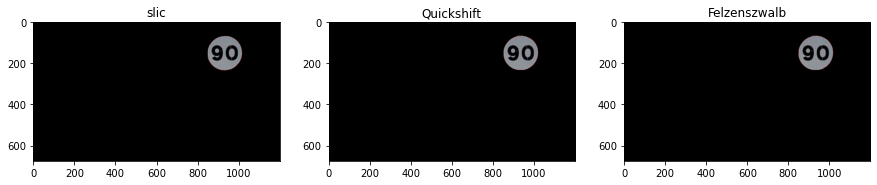

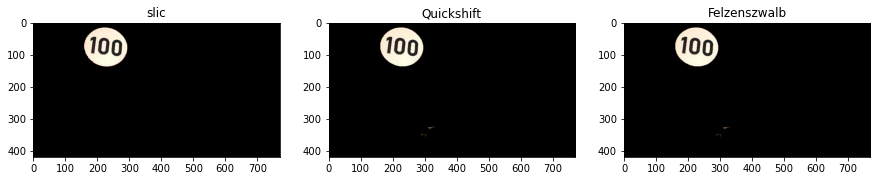

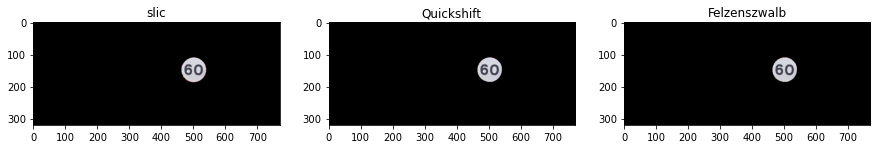

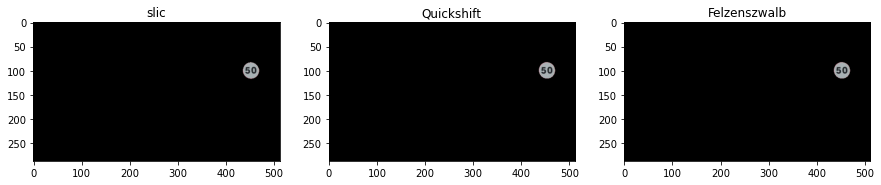

In [9]:
plot3(coloreo_senal(etiquetas_color_slic_mask1,img1),coloreo_senal(etiquetas_color_quickshift_mask1,img1),coloreo_senal(etiquetas_color_quickshift_mask1,img1))
plot3(coloreo_senal(etiquetas_color_slic_mask2,img2),coloreo_senal(etiquetas_color_quickshift_mask2,img2),coloreo_senal(etiquetas_color_quickshift_mask2,img2))
plot3(coloreo_senal(etiquetas_color_slic_mask3,img3),coloreo_senal(etiquetas_color_quickshift_mask3,img3),coloreo_senal(etiquetas_color_quickshift_mask3,img3))
plot3(coloreo_senal(etiquetas_color_slic_mask4,img4),coloreo_senal(etiquetas_color_quickshift_mask4,img4),coloreo_senal(etiquetas_color_quickshift_mask4,img4))

Se concluye que todos los segmentadores y la estrategia posterior de clasificación cumplen su cometido.
Se ha presentado un único fallo para el segmentador SLIC en señales de tráfico más lejanas y oscuras. Se debe no al segmentador
sino a la estrategia de determinar regiones por su tono de rojo. Si bien es el más rápido en este sentido ha sido menos fiable.

#### 3.- Comparativa de segmentadores
Para determinar la efectividad de cada segmentador se realizará una comparación pixel a pixel entre las binarizaciones generadas y un ground truth
realizado a mano. A partir de aquí se calcularán las matrices de confusión correspondientes.

Para la detección adecuada de las señales es imporante tanto el acierto en pixeles positivos y negativos como evitar los falsos
positivos y negativos. Por este motivo se utilizan las métricas de accuracy y F1 Score.

In [10]:
def compara(prediction,ground_truth):
    tp, tn, fp, fn = 0,0,0,0
    for i in range(prediction.shape[0]):
            for j in range(prediction.shape[1]):
                if (prediction[i][j][0] == 1 and ground_truth[i][j][0] == 1):
                    tp+=1
                elif (prediction[i][j][0] == 0 and ground_truth[i][j][0] == 0):
                    tn+=1
                elif (prediction[i][j][0] == 1 and ground_truth[i][j][0] == 0):
                    fp+=1
                elif (prediction[i][j][0] == 0 and ground_truth[i][j][0] == 1):
                    fn+=1
    result=[tp,tn,fp,fn]
    return result

def matriz_confusion(results, name):
    print(name)
    print("TP:",str(results[0]),"TN:",str(results[1]),"FP:",str(results[2]),"FN:",str(results[3]))
    print("Accuracy:",str((results[0]+results[1])/(results[0]+results[1]+results[2]+results[3])),
          "F1 Score:",str(2*(results[0]/(2*results[0]+results[2]+results[3]))),"\n")

Este paso binariza las imágenes de Groung Truth, que en bruto son en color, para poder comparar con las generadas por nuestro segmentador.

In [17]:
def binariza(img):
    for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i][j][0] > 250:
                    img[i][j][0] = 0
                else:
                    img[i][j][0] = 1
    return img

img1gt = binariza(io.imread('senal1gt.jpg'))
img2gt = binariza(io.imread('senal2gt.jpg'))
img3gt = binariza(io.imread('senal3gt.jpg'))
img4gt = binariza(io.imread('senal6gt.jpg'))

La comparativa de segmentadores para la imagen 1:

In [18]:
matriz_confusion(compara(etiquetas_color_slic_mask1,img1gt),"Imagen: Img1 Segmentador:SLIC")
matriz_confusion(compara(etiquetas_color_quickshift_mask1,img1gt),"Imagen: Img1 Segmentador:Quickshift")
matriz_confusion(compara(etiquetas_color_fb_mask1,img1gt),"Imagen: Img1 Segmentador:Felzenszwalb")

Imagen: Img1 Segmentador:SLIC
TP: 16126 TN: 790957 FP: 2358 FN: 559
Accuracy: 0.9963987654320988 F1 Score: 0.9170576359862379 

Imagen: Img1 Segmentador:Quickshift
TP: 15981 TN: 791572 FP: 1743 FN: 704
Accuracy: 0.996979012345679 F1 Score: 0.9288848847685198 

Imagen: Img1 Segmentador:Felzenszwalb
TP: 15929 TN: 791412 FP: 1903 FN: 756
Accuracy: 0.9967172839506173 F1 Score: 0.9229654952632036 



La comparativa de segmentadores para la imagen 2:

In [19]:
matriz_confusion(compara(etiquetas_color_slic_mask2,img2gt),"Imagen: Img2 Segmentador:SLIC")
matriz_confusion(compara(etiquetas_color_quickshift_mask2,img2gt),"Imagen: Img2 Segmentador:Quickshift")
matriz_confusion(compara(etiquetas_color_fb_mask2,img2gt),"Imagen: Img2 Segmentador:Felzenszwalb")

Imagen: Img2 Segmentador:SLIC
TP: 2885 TN: 316456 FP: 3219 FN: 840
Accuracy: 0.9874489795918368 F1 Score: 0.5870383558856446 

Imagen: Img2 Segmentador:Quickshift
TP: 2877 TN: 315674 FP: 4001 FN: 848
Accuracy: 0.9850061842918986 F1 Score: 0.5426766009619919 

Imagen: Img2 Segmentador:Felzenszwalb
TP: 2817 TN: 315113 FP: 4562 FN: 908
Accuracy: 0.9830859616573903 F1 Score: 0.5073847262247838 



La comparativa de segmentadores para la imagen 3:

In [20]:
matriz_confusion(compara(etiquetas_color_slic_mask3,img3gt),"Imagen: Img3 Segmentador:SLIC")
matriz_confusion(compara(etiquetas_color_quickshift_mask3,img3gt),"Imagen: Img3 Segmentador:Quickshift")
matriz_confusion(compara(etiquetas_color_fb_mask3,img3gt),"Imagen: Img3 Segmentador:Felzenszwalb")

Imagen: Img3 Segmentador:SLIC
TP: 3755 TN: 237559 FP: 4641 FN: 445
Accuracy: 0.9793587662337663 F1 Score: 0.5962210225468403 

Imagen: Img3 Segmentador:Quickshift
TP: 3810 TN: 237393 FP: 4807 FN: 390
Accuracy: 0.9789082792207793 F1 Score: 0.5945228992744012 

Imagen: Img3 Segmentador:Felzenszwalb
TP: 3742 TN: 237552 FP: 4648 FN: 458
Accuracy: 0.9792775974025975 F1 Score: 0.594440031771247 



La comparativa de segmentadores para la imagen 4:

In [21]:
matriz_confusion(compara(etiquetas_color_slic_mask4,img4gt),"Imagen: Img1 Segmentador:SLIC")
matriz_confusion(compara(etiquetas_color_quickshift_mask4,img4gt),"Imagen: Img1 Segmentador:Quickshift")
matriz_confusion(compara(etiquetas_color_fb_mask4,img4gt),"Imagen: Img1 Segmentador:Felzenszwalb")

Imagen: Img1 Segmentador:SLIC
TP: 595 TN: 146505 FP: 201 FN: 155
Accuracy: 0.9975857204861112 F1 Score: 0.7697283311772316 

Imagen: Img1 Segmentador:Quickshift
TP: 606 TN: 146503 FP: 203 FN: 144
Accuracy: 0.9976467556423612 F1 Score: 0.777421423989737 

Imagen: Img1 Segmentador:Felzenszwalb
TP: 582 TN: 146542 FP: 164 FN: 168
Accuracy: 0.9977484809027778 F1 Score: 0.7780748663101604 



Los resultados para cada imagen son muy similares, presentando los tres segmentadores valores
altos de accuracy. SLIC presenta una décima más en algún caso si bien a cosa de ceder esa décima en F1Score a Quickshift o Felzenswalb.
Dado lo ajustado de los resultados y que SLIC presenta una clara ventaja en tiempo de computación, podría ser
un buen candidato para implementar la herramienta propuesta sobre este segmentador.

#### 4.- Conclusiones
A continuación y a modo de recapitulación se muestran las diferentes imágenes generadas
y cuya función ha sido explicada a lo largo del presente notebook.

Text(0.5, 1.0, 'Recorte generado')

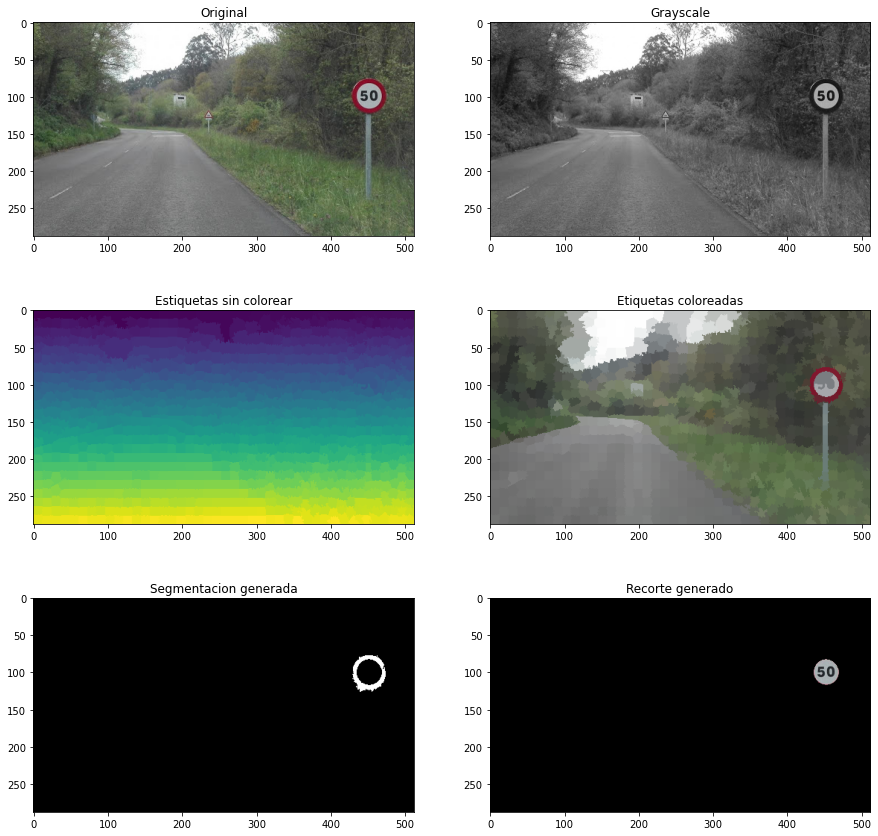

In [24]:
fig1, axs = plt.subplots(ncols=2,nrows=3,figsize=(15,15))
axs[0][0].imshow(img4)
axs[0][0].set_title("Original")

axs[0][1].imshow(rgb2gray(img4),cmap='gray')
axs[0][1].set_title("Grayscale")

axs[1][0].imshow(etiquetas_slic4)
axs[1][0].set_title("Estiquetas sin colorear")

axs[1][1].imshow(etiquetas_color_slic4)
axs[1][1].set_title("Etiquetas coloreadas")

axs[2][0].imshow(etiquetas_color_slic_mask4)
axs[2][0].set_title("Segmentacion generada")

axs[2][1].imshow(coloreo_senal(etiquetas_color_slic_mask4,img4))
axs[2][1].set_title("Recorte generado")


Se concluye que es posible la segmentación de señales de tráfico, siendo el más rápido de
los segmentadores el tipo SLIC. Cabe destacar que es necesaria información adicional
para clasificar las regiones que corresponden a señal respecto del resto de la imágen. La estrategia
basada en el color rojo ha resultado adecuada, siendo además de utilidad la aplicación de operadores morfológicos. El tiempo de computación es clave al tratarse de un vehículo en movimiento.
La estrategia planteada podría mejorarse en exactitud y velocidad asumiendo que en su implementación
real se realizaría sobre una cámara conocidad y con la posibilidad de parámetros adicionales.